# Linear regression (polynomials)

The effect of regularization on polygonal fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pylab as pl
from IPython import display

np.random.seed(0)

## Data generation

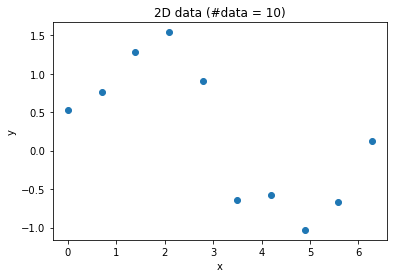

In [2]:
N = 10 # number of data points
x = np.linspace(0,2*np.pi,N)
y = np.sin(x) + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

## Fitting polynomial

In [3]:
def polyfit(x,y,degree,delta):
    """
    Fits a polynomial to 2D data (x,y)
    
    Arguments:
        x, y -- x and y data points
        degree -- polynomial degree
        delta -- regularization parameter
        
    Returns:
        Fitted parameters theta, where y = p(x) = \sum_{i=0}^degree \theta_i x^i
    """
    
    # Setting up the design matrix
    X = np.ones([len(x), 1]) 
    for i in range(degree):
        X = np.append(X, x[:,None]**(i+1),1)
    
    # Setting up the target vector
    Y = np.vstack([y]).T

    XtX = np.dot(X.T, X)
    XtX = XtX - np.identity(len(XtX))*delta*delta
    XtY = np.dot(X.T, Y)
    theta = np.dot(np.linalg.inv(XtX), XtY)
    return theta

def polyeval(theta, x):
    """
    Evaluates a 1D polynomial (i.e., fitted to 2D points (x,y))
    
    Arguments:
        x -- points at which we want to evaluate the polynomial
        theta -- polynomial parameters
        
    Returns:
        p(x) -- where p(x) = \sum_{i=0}^degree \theta_i x^i
    """
    degree = len(theta)
    y = np.zeros(x.shape)
    for i in range(len(x)):
        for j in range(degree):
            y[i] += (theta[j] * (x[i]**(j)))
    return y

### Polynomial fitting without using gradient descent

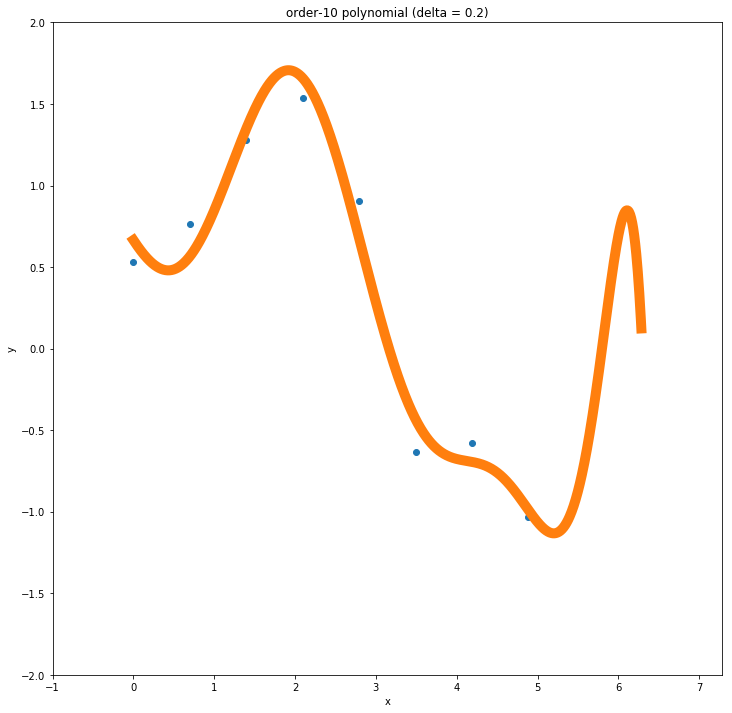

In [4]:
delta = 0.2
degree = 10
theta = polyfit(x,y,degree=degree,delta=delta)

x_new = np.linspace(0,2*np.pi,1000)
y_est = polyeval(theta, x_new)

plt.figure(figsize=(12,12))
plt.plot(x,y,'o')
plt.plot(x_new, y_est, '-', linewidth=10)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([x_new[0]-1,x_new[-1]+1])
plt.ylim(-2,2)
plt.title('order-%d polynomial (delta = %0.1f)' % (degree, delta))
plt.show()
#plt.savefig('regularization-0.png')

### Polynomial fitting using gradient descent

Least squares cost is:

$$J(\theta) = (X \theta - Y)^T (X \theta - Y)$$

Gradient:

$$\nabla J(\theta) = (X^T X) \theta + X^T Y  $$

Gradient descent update:

$$\theta^{(new)} = \theta^{(old)} - \nabla J(\theta)$$

In [5]:
def gradient_descent(x,y,degree,theta,learningrate=0.0001,itr=40,delta=0):
    # Setting up the design matrix
    X = np.ones([len(x), 1]) 
    for i in range(degree):
        #print 'i', i
        X = np.append(X, x[:,None]**(i+1),1)
    #print X
    
    x_eval = np.linspace(x[0],x[-1],1000)
    
    # Setting up the target vector
    Y = np.vstack([y]).T
    #print Y
    
    XtX = np.dot(X.T,X)
    XtY = np.dot(X.T,Y)
        
    error = np.zeros([itr])    
    for i in range(itr):
        #print 'i', i
        
        small_norm = False
        grad =  (np.dot(XtX,theta) - XtY)

        if np.linalg.norm(grad) < .0001:
            small_norm = True

        grad /= np.linalg.norm(grad)
        theta = theta - learningrate*grad

        #print 'Norm', np.linalg.norm(grad)
        #print 'grad', grad


        E = Y - np.dot(X,theta)
        error[i] = np.dot(E.T, E)
        
        y_eval = polyeval(theta, x_eval)

        
        if i <= 1 or i % 1000 == 0 or small_norm:
            plt.plot(x,y,'g.')
            plt.plot(x_eval,y_eval,'b')
            plt.title('Error %f, %f' % (error[i], np.linalg.norm(grad)))
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(0.1)
            plt.clf()
            
        if small_norm:
            print 'Small norm'
            return error
        
    print 'Done'
    return error

## Effect of learning rate

In the following pick degree = 2, and learningrate=0.0001.  Then try learningrate = 0.1.

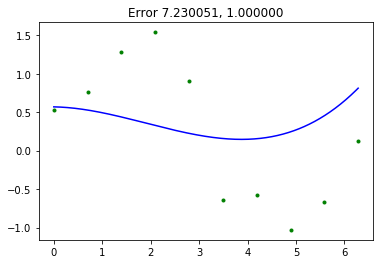

Done


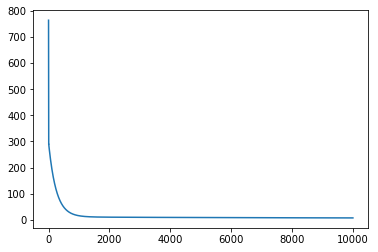

In [7]:
degree = 3
learningrate=0.01
itr = 10000
theta = np.random.normal(0,1,[degree+1]).reshape(degree+1,1) # Setting up a random intial theta (column-vector)
error = gradient_descent(x,y,degree=degree,theta=theta,itr=itr,learningrate=learningrate)

plt.plot(error)

### Effect of delta (regularization parameter) on theta (polynomial parameters)

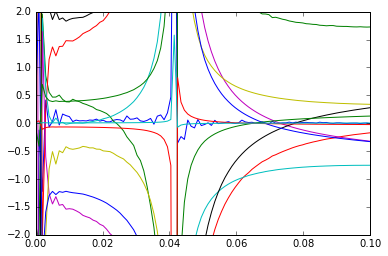

In [25]:
degree = 11

delta_range = np.linspace(0,.1,100)
theta = np.zeros([len(delta_range), degree+1])    

i=0
for d in delta_range:
    theta[i,:] = np.transpose(polyfit(x,y,degree=degree,delta=d))
    i += 1
    
plt.figure()
for i in range(degree):
    plt.plot(delta_range, theta[:,i])
plt.ylim(-2,2)
plt.xlim(0,0.1)
plt.show()

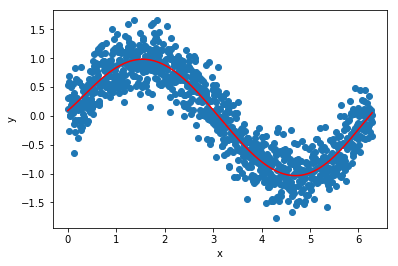

In [32]:
p = np.poly1d(np.polyfit(x, y, deg=5))

x_new = np.linspace(0,2*np.pi,1000)
y_est = p(x_new)

plt.figure()
plt.plot(x,y,'o')
plt.plot(x_new, y_est, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()